Note the pre requisite to understand below material is to know confidence intervals for difference between two means as we straight away use the definitions from there. In fact, entire hypothesis testing concept is always understood better after learning confidence intervals and is the typical order in many textbooks.

# $\sigma$ known, sample sizes are high

Suppose that we are interested in comparing two approximately normal sampling distributions described by random variables $\overline{X} = N(\mu_{\overline{x}},\sigma_{\overline{x}}^2)$ and $\overline{Y} = N(\mu_{\overline{y}}, \sigma_{\overline{y}}^2)$, created from population distributions described by random variables $X(\mu_x,\sigma_x^2)$ and $Y(\mu_y,\sigma_y^2)$.	Note that $\overline{X}$ represents collection of sample means from sampled sets sampled from X and similarly for $\overline{Y}$. Since both $\overline{X}$ and $\overline{Y}$ are normally distributed, and assuming both are independent to each other, the distribution $W = \overline{X} - \overline{Y}$ would be again a normal distribution $W(\mu_w,\sigma_w^2)$, where $\mu_w = \mu_{\overline{x}} - \mu_{\overline{y}}$ and $\sigma_w^2 = \sigma_{\overline{x}}^2 + \sigma_{\overline{y}}^2$. 

In [1]:
%load_ext tikzmagic

In [2]:
preamble = '''

    \pgfmathdeclarefunction{gauss}{3}{%
      \pgfmathparse{1/(#3*sqrt(2*pi))*exp(-((#1-#2)^2)/(2*#3^2))}%
    }
    
    \pgfmathdeclarefunction{gamma}{1}{%
        \pgfmathparse{2.506628274631*sqrt(1/#1)+ 0.20888568*(1/#1)^(1.5)+ 0.00870357*(1/#1)^(2.5)- (174.2106599*(1/#1)^(3.5))/25920- (715.6423511*(1/#1)^(4.5))/1244160)*exp((-ln(1/#1)-1)*#1}%
    }

    \pgfmathdeclarefunction{student}{2}{%
        \pgfmathparse{gamma((#2+1)/2.)/(sqrt(#2*pi) *gamma(#2/2.)) *((1+(#1*#1)/#2)^(-(#2+1)/2.))}%
    }

    \pgfmathdeclarefunction{student_n}{4}{%
        \pgfmathparse{student((#1 - #3)*(sqrt(#2 + 1)/#4), #2)}%
    }
'''

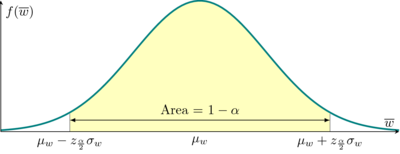

In [3]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
		no markers, 
		domain=0:6, 
		samples=100,
		ymin=0,
		axis lines*=left, 
		xlabel=$\overline{w}$,
		ylabel=$f(\overline{w})$,
		height=5cm, 
		width=12cm,
		xtick=\empty, 
		ytick=\empty,
		enlargelimits=false, 
		clip=false, 
		axis on top,
		grid = major,
		axis lines = middle
		]
		
		\def\mean{3}
		\def\sd{1}
		\def\cilow{\mean - 1.96*\sd}
		\def\cihigh{\mean + 1.96*\sd}
		\addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
		\addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};
		
		\pgfmathsetmacro\valueA{gauss(1,\mean,\sd)}
		\draw [gray] (axis cs:\cilow,0) -- (axis cs:\cilow,\valueA) (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
	    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow, 0) -- node [above] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

		\node[below] at (axis cs:\cilow, 0)  {$\mu_w - z_{\frac{\alpha}{2}}\sigma_w$}; 
		\node[below] at (axis cs:\mean, 0)  {$\mu_w$}; 
		\node[below] at (axis cs:\cihigh, 0)  {$\mu_w + z_{\frac{\alpha}{2}}\sigma_w$}; 
		
		
		\end{axis}

Then, we already know the confidence intervals could be calculated as below.  

$P\Bigg(-z_{\frac{\alpha}{2}} \leq \dfrac{ (\overline{X} - \overline{Y}) - (\mu_{\overline{x}} - \mu_{\overline{y}}) }{\sqrt{\frac{\sigma_{\overline{x}}^2}{n} + \frac{\sigma_{\overline{y}}^2}{m}}} \leq z_{\frac{\alpha}{2}}\Bigg) \approx 1 - \alpha$

For Hypothesis testing, let the problem at hand is to wonder, if one mean is greater than the other. For eg, if $\mu_{\overline{x}} > \mu_{\overline{y}}$. This is another way of saying if $\mu_w > 0$. Then we could formulate our hypothesis as follows.  

Null hypothesis: $H_0: \mu_w = 0$  
Alternate hypothesis: $H_a: \mu_w > 0$

Then the probability of making Type I error $\alpha$, would be right hand tail area as follows. Note $z_{\frac{\alpha}{2}}$ becoming $z_{\alpha}$ as now its one side area we are interested in. 

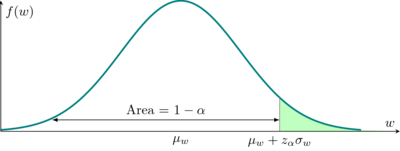

In [4]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
		no markers, 
		domain=0:6, 
		samples=100,
		ymin=0,
		axis lines*=left, 
		xlabel=$w$,
		ylabel=$f(w)$,
		height=5cm, 
		width=12cm,
		xtick=\empty, 
		ytick=\empty,
		enlargelimits=false, 
		clip=false, 
		axis on top,
		grid = major,
		axis lines = middle
		]
		
		\def\mean{3}
		\def\sd{1}
		\def\cilow{\mean - 1.645*\sd}
		\def\cihigh{\mean + 1.645*\sd}
		
		
		\addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;
		
		\addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};
		
		\pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
		\draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
		
		
	    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

		\node[below] at (axis cs:\mean, 0)  {$\mu_w$}; 
		\node[below] at (axis cs:\cihigh, 0)  {$\mu_w + z_{\alpha}\sigma_w$}; 
		
		
		\end{axis}

\begin{equation}
    \begin{aligned}
        P( w \geq \mu_w + z_{\alpha}\sigma_w) = \alpha \nonumber \\
        P(w - \mu_w \geq z_{\alpha}\sigma_w) = \alpha \nonumber \\
        P\Big(\dfrac{w - \mu_w}{\sigma_w} \geq z_{\alpha}\Big) = \alpha \nonumber \\
        P\Bigg( \dfrac{ (\overline{X} - \overline{Y}) -(\mu_{\overline{x}} - \mu_{\overline{y}}) }{  \sqrt{ \frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m} }  } \geq  z_{\alpha} \Bigg) = \alpha \label{eq:101}
    \end{aligned}
\end{equation}

Since our null hypothesis is $\mu_w = 0$ or $\mu_{\overline{x}} = \mu_{\overline{y}}$, we could reduce the equation further as, 

\begin{equation}
    \begin{aligned}
        P\Bigg( \dfrac{ \overline{X} - \overline{Y} }{  \sqrt{ \frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m} }  } \geq  z_{\alpha} \Bigg) = \alpha \label{eq:102}
    \end{aligned}
\end{equation}

So if Z score of difference between sample means $Z = \dfrac{\overline{X} - \overline{Y}}{\sqrt{ \frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m}}}$, then the probability of making Type I error $\alpha$ is $P(Z \geq z_{\alpha})$. This is depicted below. 

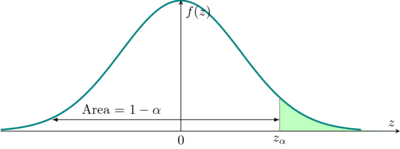

In [5]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
		no markers, 
		domain=-3:3, 
		samples=100,
		ymin=0,
		axis lines*=left, 
		xlabel=$z$,
		ylabel=$f(z)$,
		height=5cm, 
		width=12cm,
		xtick=\empty, 
		ytick=\empty,
		enlargelimits=false, 
		clip=false, 
		axis on top,
		grid = major,
		axis lines = middle
		]
		
		\def\mean{0}
		\def\sd{1}
		\def\cilow{\mean - 1.645*\sd}
		\def\cihigh{\mean + 1.645*\sd}
		
		
		\addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;
		
		\addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};
		
		\pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
		\draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
		
		
	    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above left] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

		\node[below] at (axis cs:\mean, 0)  {0}; 
		\node[below] at (axis cs:\cihigh, 0)  {$z_{\alpha}$}; 
		
		
		\end{axis}

So if the calculate Z score from the sample set values $(\overline{x},\overline{y})$ exceeds $z_{\alpha}$ we could straight away **reject null hypothesis** because there is a stronger evidence that the alternate could be true. And we could derive similar Z score for $\mu$ decreasing or unequal, but it is much easier to directly tackling the problem than complicating the formula. 

# Visual Summary 

Since we use the same components of confidence intervals in hypothesis testing, it helps to recall once the visual summary we have seen there. 

\ 


# Examples

## $\sigma$ unknown, sample sizes are high

As seen in visual summary (**PR2**), in this case, we still could use Z distribution, while we use sample set's unbiased standard deviations $(s_x,s_y)$ in the place of $(\sigma_x,\sigma_y)$ as best estimators. Since sample sizes are high, due to CLT, the sampling distribution would still be approximately normal, and our hypothesis testing approximately valid. 

_Lets assume we have two different ways to lose wieght, and we have to figure out which one is the most effective. We have 10000 people who received treatment A and their average loss is 10 pounds. The standard deviation of their loss is also 10 pounds. Lets consider a second treatment, Treatment B. We also applied it to 10000 people. The average loss in this case is 20 pounds and we also have a standard deviation of 20 pounds. Allowed false positive rate is 5%_ 

Also given is, null hypothesis $H_0: \mu_A = \mu_B$  

Alternate hypotheis is $H_a: \mu_B > \mu_A$

**[Solution](https://youtu.be/L3s-jrNJ3KQ)**  


Whoa! Sample sizes are so high $>>> 30$. Also $W = B - A$ as we take the hint from alternate hypothesis. So we could rewrite equation \ref{eq:102} as per **PR2** in context as below

\begin{equation}
    \begin{aligned}
        P\Bigg( \dfrac{ \overline{B} - \overline{A} }{  \sqrt{ \frac{S_B^2}{n} + \frac{S_A^2}{m} }  } \geq  z_{\alpha} \Bigg) = \alpha \label{eq:103}
    \end{aligned}
\end{equation}

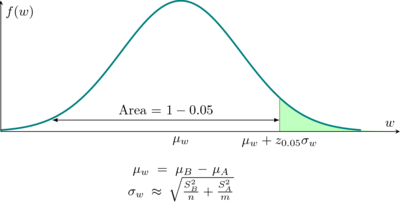

In [6]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
		no markers, 
		domain=0:6, 
		samples=100,
		ymin=0,
		axis lines*=left, 
		xlabel=$w$,
		ylabel=$f(w)$,
		height=5cm, 
		width=12cm,
		xtick=\empty, 
		ytick=\empty,
		enlargelimits=false, 
		clip=false, 
		axis on top,
		grid = major,
		axis lines = middle
		]
		
		\def\mean{3}
		\def\sd{1}
		\def\cilow{\mean - 1.645*\sd}
		\def\cihigh{\mean + 1.645*\sd}
		
		
		\addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;
		
		\addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};
		
		\pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
		\draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
		
		
	    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above] {Area = $1-0.05$} (axis cs:\cihigh, 0);   

		\node[below] at (axis cs:\mean, 0)  {$\mu_w$}; 
		\node[below] at (axis cs:\cihigh, 0)  {$\mu_w + z_{0.05}\sigma_w$}; 
		
        \node[below=0.75cm,align=center,text width=4cm] at (axis cs:\mean, 0)
        {
            $\mu_w = \mu_B - \mu_A$
            $\sigma_w \approx \sqrt{ \frac{S_B^2}{n} + \frac{S_A^2}{m} } $
        };
		
		\end{axis}

**Given:**  

_B_: $n = 10000, \overline{b} = 20, s_B = 20$  
_A_: $m = 10000, \overline{a} = 10, s_A = 10$  

5% False positive rate would mean, we could be false 5% of the time while reality is true. This is type I error (rejecting null hypothesis, when null hypothesis is true in reality). Thus,  $\alpha = 0.05$. So what would be $z_{\alpha} = z_{0.05}$?

In [7]:
import scipy.stats as st
z_a = st.norm.ppf(1-.05)  # as scipy is left tailed by default
print(z_a)

1.6448536269514722


Therefore, $z_{\alpha} = z_{0.05} = 1.645$. 

Let us try to create temporary critical region for W. Our given sample value $\overline{w} = 20 - 10 = 10$. We could say, if our hypothetical next sample means are if or above 10, we would reject the null hypothesis, and then wonder if that is the case, what would be our probability of making Type I error? Will we be in allowed limit of 0.05? 

Note that, the critical region for permissible Type I probability of $\alpha$ starts at $(\mu_w + z_{0.05}\sigma_w)$. Since this is when null hypothesis is assumed, it is $z_{0.05}\sigma_w$ which is about 0.367. So any difference beyond 0.367, we could simply reject null hypothesis, that $\mu_A = \mu_B$. 

In [8]:
s_a, s_b, n, m = 10, 20, 10000, 10000
from math import sqrt
s_w = sqrt( (s_a**2)/m + (s_b**2)/n )
print(s_w)
print(s_w*z_a)

0.22360679774997896
0.3678004522900572


This situation is depicted below (not drawn at scale on x axis)

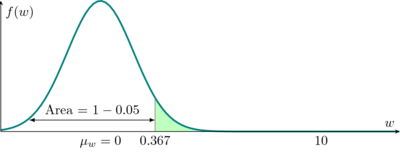

In [9]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
		no markers, 
		domain=0:12, 
		samples=100,
		ymin=0,
		axis lines*=left, 
		xlabel=$w$,
		ylabel=$f(w)$,
		height=5cm, 
		width=12cm,
		xtick=\empty, 
		ytick=\empty,
		enlargelimits=false, 
		clip=false, 
		axis on top,
		grid = major,
		axis lines = middle
		]
		
		\def\mean{3}
		\def\sd{1}
		\def\cilow{\mean - 1.645*\sd}
		\def\cihigh{\mean + 1.645*\sd}
		
		
		\addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;
		
		\addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};
		
		\pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
		\draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
		
		
	    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above] {Area = $1-0.05$} (axis cs:\cihigh, 0);   

		\node[below] at (axis cs:\mean, 0)  {$\mu_w = 0$}; 
		\node[below] at (axis cs:\cihigh, 0)  {$0.367$}; 
        \node[below] at (axis cs:\cihigh+5, 0)  {$10$}; 
		
		
		\end{axis}

Now it would be evident beyond doubt that, we are well within permissible limits of 0.05 for making Type I error, which in fact is almost 0, to choose to reject null hypothesis, and suggest $\mu_B > \mu_A$. If we deployed equation \ref{eq:103} also we would have arrived at same conclusion. We could verify that as well. Rewriting \ref{eq:103},

\begin{equation}
    \begin{aligned}
        P\Bigg( \dfrac{ \overline{b} - \overline{a} }{  \sqrt{ \frac{s_B^2}{n} + \frac{s_A^2}{m} }  } \geq  1.645 \Bigg) = 0.05 \nonumber \\
    \end{aligned}
\end{equation}

Recall, once the sample set is observed, there is no more probability about it. The calculated Z value is either above $Z_{\alpha}$ or not.

In [10]:
b_bar, a_bar = 20, 10
zs = (b_bar - a_bar)/s_w
print(zs)

44.721359549995796


Our Z score $44 >> 1.645$, so this again means, while the probability of Z score to be $\geq 1.645$ was just 5%, provided null hypothesis was true. Looking at the rarity of this outcome if null hypothesis is true, it would be sane to conclude that this is a strong evidence that alternate hypothesis might be true. This strongly supports alternative hypothesis. This is depicted below (x axis not drawn at scale)

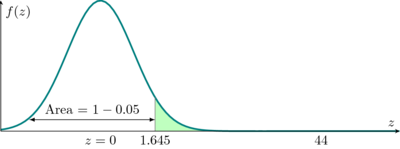

In [11]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
		no markers, 
		domain=0:12, 
		samples=100,
		ymin=0,
		axis lines*=left, 
		xlabel=$z$,
		ylabel=$f(z)$,
		height=5cm, 
		width=12cm,
		xtick=\empty, 
		ytick=\empty,
		enlargelimits=false, 
		clip=false, 
		axis on top,
		grid = major,
		axis lines = middle
		]
		
		\def\mean{3}
		\def\sd{1}
		\def\cilow{\mean - 1.645*\sd}
		\def\cihigh{\mean + 1.645*\sd}
		
		
		\addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;
		
		\addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};
		
		\pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
		\draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
		
		
	    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above] {Area = $1-0.05$} (axis cs:\cihigh, 0);   

		\node[below] at (axis cs:\mean, 0)  {$z = 0$}; 
		\node[below] at (axis cs:\cihigh, 0)  {$1.645$}; 
        \node[below] at (axis cs:\cihigh+5, 0)  {$44$}; 
		
		
		\end{axis}

We are thus in a very good position to reject null hypothesis and support alternate hypothesis $H_a: \mu_B > \mu_A$

## $\sigma$ unknown, unequal and sample sizes are low

As seen in visual summary, we need to use **PR4**, that is Welch's t interval. Note the cumbersom calculation for calculating degrees of freedom. 

_Independent random samples of 17 sophomores and 13 juniors attending a large university yield the following data on grade point averages.At the 5% significance level, do the data provide sufficient evidence to conclude that the mean GPAs of sophomores and juniors at the university differ?_

**Sample Data:**  
sophomor: $n = 17, \overline{x} = 2.84, s_x = 0.520$  
juniors: $m = 13, \overline{y} = 2.9808, s_x = 0.3093$  

**[Solution](https://onlinecourses.science.psu.edu/stat500/node/50/):**  

The problem wonders if both the means **differ** so we would need to consider both tails.  

Null hypothesis: $\mu_w = 0$ or $\mu_x = \mu_y$  
Alternate hypothesis: $\mu_w \neq 0$ or $\mu_x \neq \mu_y$  
$\alpha = 0.05$. 

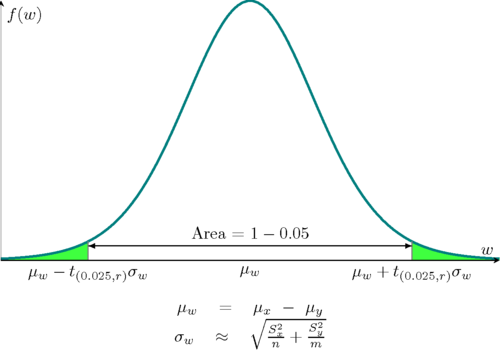

In [12]:
%%tikz -p pgfplots -x $preamble --size 500,500
    \begin{axis}[
            no markers, 
            domain=13:15, 
            samples=100,
            ymin=0,
            axis lines*=left, 
            xlabel=$w$,
            ylabel=$f(w)$,
            height=7cm, 
            width=12cm,
            xtick=\empty, 
            ytick=\empty,
            enlargelimits=false, 
            clip=false, 
            axis on top,
            grid = major,
            axis lines = middle,
            y axis line style={draw opacity=0.25}
    ]
        \def\mean{14}
        \def\sd{1}
        \def\df{13}
        \def\cilow{13}
        \def\cihigh{15}
        \def\midl{13.35}
        \def\midr{14.65}
        
        \addplot [draw=none, fill=green!75, domain=\cilow:\midl] {student_n(x, \df, \mean, \sd)} \closedcycle;
        \addplot [draw=none, fill=green!75, domain=\midr:\cihigh] {student_n(x, \df, \mean, \sd)} \closedcycle;  
        
        \addplot [very thick,cyan!50!black, domain=\cilow:\cihigh] {student_n(x, \df, \mean, \sd)};

        \addplot [ycomb, gray, no markers, samples at={\midl, \midr}] {student_n(x, \df, \mean, \sd)};

        \draw [yshift=0.3cm, latex-latex](axis cs:\midl, 0) -- node [above] {Area = $1-0.05$} (axis cs:\midr, 0);   
        
        \node[below] at (axis cs:\mean, 0)  {$\mu_w$}; 
        \node[below] at (axis cs:\midl, 0)  {$\mu_w - t_{(0.025,r)}\sigma_w$};
        \node[below] at (axis cs:\midr, 0)  {$\mu_w + t_{(0.025,r)}\sigma_w$}; 
        
    \node[below=0.75cm,align=center,text width=8cm] at (axis cs:\mean, 0)
    {        
        $\mu_w = \mu_x - \mu_y$ \\ $\sigma_w \approx \sqrt{ \frac{S_x^2}{n} + \frac{S_y^2}{m} }$
    };
 \end{axis}

In welch's method, the degrees of freedom, $r$ is the complicated one to calculate. It is given by integer part of below equation. 

$$
\displaystyle
r=\frac{ (\frac{s_x^2}{n} + \frac{s_y^2}{m})^2 }{ \frac{1}{n-1}(\frac{s_x^2}{n})^2 + \frac{1}{m-1}(\frac{s_y^2}{m})^2 }
$$

In [13]:
s_x, s_y, n, m = 0.52, 0.3093, 17, 13

num = ( s_x**2/n + s_y**2/m )**2
den1 = (1/(n-1))*( s_x**2/n )**2
den2 = (1/(m-1))*( s_y**2/m )**2
den = den1+den2
r = num/den
print(r)

26.629678365237567


The degrees of freedom is the integer part of our result 26.629 which is $r = 26$. Let us then calculate the 't' score for our significance level $\alpha$, 

In [14]:
from scipy import stats
ts = stats.t.ppf(0.025, 26) # return value is left tailed by default..
print(ts)  

-2.0555294386428713


Therefore, $t_{(\alpha/2,r)} = t_{(0.025,26)} = 2.055$. We could now calculate the limits above or below which Type I error is allowed. Assuming $\mu_w  = 0$ due to null hypothesis, $t_{(0.025,26)}\sigma_w$ should give us the limits. 

In [15]:
from math import sqrt
s_w = sqrt( (s_x)**2/n + (s_y)**2/m  )
print(s_w, s_w*ts)

0.15252817156896606 -0.31352614688238034


Thus our critical region for given $\alpha$ would be $\pm 0.313$. Our situation could be depicted as below. We are allowed to reject null hypothesis, if our sample set mean difference is above 0.313 or below -0.313, with $\alpha=0.05$ probability of making Type I error. 

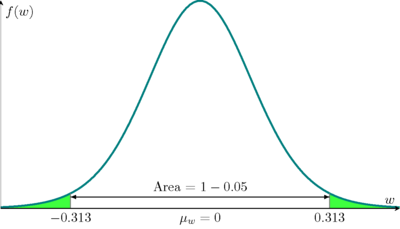

In [16]:
%%tikz -p pgfplots -x $preamble
    \begin{axis}[
            no markers, 
            domain=13:15, 
            samples=100,
            ymin=0,
            axis lines*=left, 
            xlabel=$w$,
            ylabel=$f(w)$,
            height=7cm, 
            width=12cm,
            xtick=\empty, 
            ytick=\empty,
            enlargelimits=false, 
            clip=false, 
            axis on top,
            grid = major,
            axis lines = middle,
            y axis line style={draw opacity=0.25}
    ]
        \def\mean{14}
        \def\sd{1}
        \def\df{13}
        \def\cilow{13}
        \def\cihigh{15}
        \def\midl{13.35}
        \def\midr{14.65}
        
        \addplot [draw=none, fill=green!75, domain=\cilow:\midl] {student_n(x, \df, \mean, \sd)} \closedcycle;
        \addplot [draw=none, fill=green!75, domain=\midr:\cihigh] {student_n(x, \df, \mean, \sd)} \closedcycle;  
        
        \addplot [very thick,cyan!50!black, domain=\cilow:\cihigh] {student_n(x, \df, \mean, \sd)};

        \addplot [ycomb, gray, no markers, samples at={\midl, \midr}] {student_n(x, \df, \mean, \sd)};

        \draw [yshift=0.3cm, latex-latex](axis cs:\midl, 0) -- node [above] {Area = $1-0.05$} (axis cs:\midr, 0);   
        
        \node[below] at (axis cs:\mean, 0)  {$\mu_w=0$}; 
        \node[below] at (axis cs:\midl, 0)  {$-0.313$};
        \node[below] at (axis cs:\midr, 0)  {$0.313$}; 
        
 \end{axis}

The difference of sample means we got is $\overline{x} - \overline{y} = 2.84 - 2.9808 = -0.1408$. This is far above -0.313, so we **cannot reject null hypothesis**. Taking $\pm 0.1408$ as critical region would increase of probability of Type I error $\alpha$ enormously as shown below.  

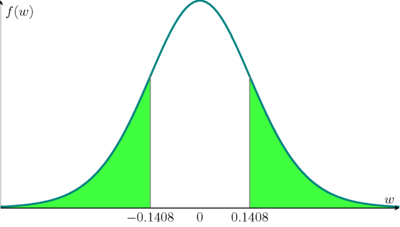

In [17]:
%%tikz -p pgfplots -x $preamble
    \begin{axis}[
            no markers, 
            domain=13:15, 
            samples=100,
            ymin=0,
            axis lines*=left, 
            xlabel=$w$,
            ylabel=$f(w)$,
            height=7cm, 
            width=12cm,
            xtick=\empty, 
            ytick=\empty,
            enlargelimits=false, 
            clip=false, 
            axis on top,
            grid = major,
            axis lines = middle,
            y axis line style={draw opacity=0.25}
    ]
        \def\mean{14}
        \def\sd{1}
        \def\df{13}
        \def\cilow{13}
        \def\cihigh{15}
        \def\midl{13.75}
        \def\midr{14.25}
        
        \addplot [draw=none, fill=green!75, domain=\cilow:\midl] {student_n(x, \df, \mean, \sd)} \closedcycle;
        \addplot [draw=none, fill=green!75, domain=\midr:\cihigh] {student_n(x, \df, \mean, \sd)} \closedcycle;  
        
        \addplot [very thick,cyan!50!black, domain=\cilow:\cihigh] {student_n(x, \df, \mean, \sd)};

        \addplot [ycomb, gray, no markers, samples at={\midl, \midr}] {student_n(x, \df, \mean, \sd)};

        %\draw [yshift=0.3cm, latex-latex](axis cs:\midl, 0) -- node [above] {Area = $1-0.05$} (axis cs:\midr, 0);   
        
        \node[below] at (axis cs:\mean, 0)  {$0$}; 
        \node[below] at (axis cs:\midl, 0)  {$-0.1408$};
        \node[below] at (axis cs:\midr, 0)  {$0.1408$}; 
        
 \end{axis}

We could have also taken the difference the other way $\overline{y} - \overline{x} = 2.9808 - 2.84 = 0.1408$, and we still would have arrived at same conclusion because we are interested in only if the sample means of two sampling distributions differ or not (that is why two tails taken in above diagram).Also we could arrive at the same conclusion via 't' values only if we already know $t_{\alpha/2,r}$. We indeed calculated that earlier as $2.055$. This means, in units of 't', critical region allowed is $\pm 2.055$ beyond which we are allowed to make Type I error, whose total probability in critical region would be 0.05. This is depicted below. 

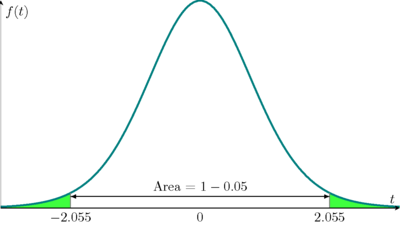

In [18]:
%%tikz -p pgfplots -x $preamble
    \begin{axis}[
            no markers, 
            domain=13:15, 
            samples=100,
            ymin=0,
            axis lines*=left, 
            xlabel=$t$,
            ylabel=$f(t)$,
            height=7cm, 
            width=12cm,
            xtick=\empty, 
            ytick=\empty,
            enlargelimits=false, 
            clip=false, 
            axis on top,
            grid = major,
            axis lines = middle,
            y axis line style={draw opacity=0.25}
    ]
        \def\mean{14}
        \def\sd{1}
        \def\df{13}
        \def\cilow{13}
        \def\cihigh{15}
        \def\midl{13.35}
        \def\midr{14.65}
        
        \addplot [draw=none, fill=green!75, domain=\cilow:\midl] {student_n(x, \df, \mean, \sd)} \closedcycle;
        \addplot [draw=none, fill=green!75, domain=\midr:\cihigh] {student_n(x, \df, \mean, \sd)} \closedcycle;  
        
        \addplot [very thick,cyan!50!black, domain=\cilow:\cihigh] {student_n(x, \df, \mean, \sd)};

        \addplot [ycomb, gray, no markers, samples at={\midl, \midr}] {student_n(x, \df, \mean, \sd)};

        \draw [yshift=0.3cm, latex-latex](axis cs:\midl, 0) -- node [above] {Area = $1-0.05$} (axis cs:\midr, 0);   
        
        \node[below] at (axis cs:\mean, 0)  {$0$}; 
        \node[below] at (axis cs:\midl, 0)  {$-2.055$};
        \node[below] at (axis cs:\midr, 0)  {$2.055$}; 
        
 \end{axis}

\begin{equation}
    \begin{aligned}
        P\Big( -t_{(\alpha/2,r)} \leq \dfrac{W - \mu_w}{\sigma_w} \leq t_{(\alpha/2,r)} \Big) = 1 - \alpha \nonumber \\ 
        2P\Big( \Big| \dfrac{W-\mu_w}{\sigma_w} \Big|  \geq |t_{(\alpha/2,r)}| \Big) = \alpha \nonumber \\
        P\Big( \Big| \dfrac{W-\mu_w}{\sigma_w} \Big|  \geq |t_{(\alpha/2,r)}| \Big) = \dfrac{\alpha}{2} \nonumber \\
        P\Big( \Big| \dfrac{W-\mu_w}{\sigma_w} \Big|  \geq |t_{(0.025,r)}| \Big) = 0.025 \nonumber \\
        P\Big( \Big| \dfrac{W-\mu_w}{\sigma_w} \Big|  \geq |t_{(0.025,26)}| \Big) = 0.025 \nonumber \\
        P\Big( \Big| \dfrac{W-\mu_w}{\sigma_w} \Big|  \geq 2.055 \Big) = 0.025 \nonumber \\
        P\Bigg( \Bigg| \dfrac{(\overline{X} - \overline{Y}) -( \mu_{\overline{x}} - \mu_{\overline{y}} )}{\sqrt{ \frac{s_x^2}{n} + \frac{s_y^2}{m} }  } \Bigg|  \geq 2.055 \Bigg) = 0.025 \nonumber \\
        P\Bigg( \Bigg| \dfrac{(\overline{X} - \overline{Y})}{\sqrt{ \frac{s_x^2}{n} + \frac{s_y^2}{m} }  } \Bigg|  \geq 2.055 \Bigg) = 0.025 \nonumber \\
    \end{aligned}
\end{equation}

When the sample set is observed, we could check if we are in critical region or not by calculating its t score. 

$t = \Bigg|\dfrac{\overline{x} - \overline{y}}{\sqrt{ \frac{s_x^2}{n} + \frac{s_y^2}{m} }}\Bigg| = 
\Big|\dfrac{2.84−2.9808}{0.1525}\Big| = 0.9232$

Our t score is 0.9232. This is well outside the critical region towards the null hypothesized zero mean difference, so if we assume this as critical region, we would be making high Type I error, beyond 0.05 as depicted below. 

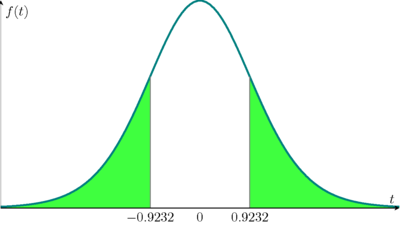

In [19]:
%%tikz -p pgfplots -x $preamble
    \begin{axis}[
            no markers, 
            domain=13:15, 
            samples=100,
            ymin=0,
            axis lines*=left, 
            xlabel=$t$,
            ylabel=$f(t)$,
            height=7cm, 
            width=12cm,
            xtick=\empty, 
            ytick=\empty,
            enlargelimits=false, 
            clip=false, 
            axis on top,
            grid = major,
            axis lines = middle,
            y axis line style={draw opacity=0.25}
    ]
        \def\mean{14}
        \def\sd{1}
        \def\df{13}
        \def\cilow{13}
        \def\cihigh{15}
        \def\midl{13.75}
        \def\midr{14.25}
        
        \addplot [draw=none, fill=green!75, domain=\cilow:\midl] {student_n(x, \df, \mean, \sd)} \closedcycle;
        \addplot [draw=none, fill=green!75, domain=\midr:\cihigh] {student_n(x, \df, \mean, \sd)} \closedcycle;  
        
        \addplot [very thick,cyan!50!black, domain=\cilow:\cihigh] {student_n(x, \df, \mean, \sd)};

        \addplot [ycomb, gray, no markers, samples at={\midl, \midr}] {student_n(x, \df, \mean, \sd)};

        %\draw [yshift=0.3cm, latex-latex](axis cs:\midl, 0) -- node [above] {Area = $1-0.05$} (axis cs:\midr, 0);   
        
        \node[below] at (axis cs:\mean, 0)  {$0$}; 
        \node[below] at (axis cs:\midl, 0)  {$-0.9232$};
        \node[below] at (axis cs:\midr, 0)  {$0.9232$}; 
        
 \end{axis}

So our conclusion is similar like earlier. We **cannot reject the null hypothesis**. 